✅ Doğruluk Oranı: 0.4884046381447421

 Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.58      0.57      0.57      2499
           1       0.48      0.47      0.47      2120
           2       0.10      0.12      0.11       241
           3       0.06      0.08      0.07       102
           4       0.00      0.00      0.00        19
           5       0.06      0.09      0.07        11
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.49      5002
   macro avg       0.13      0.13      0.13      5002
weighted avg       0.50      0.49      0.49      5002



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/IPython/c

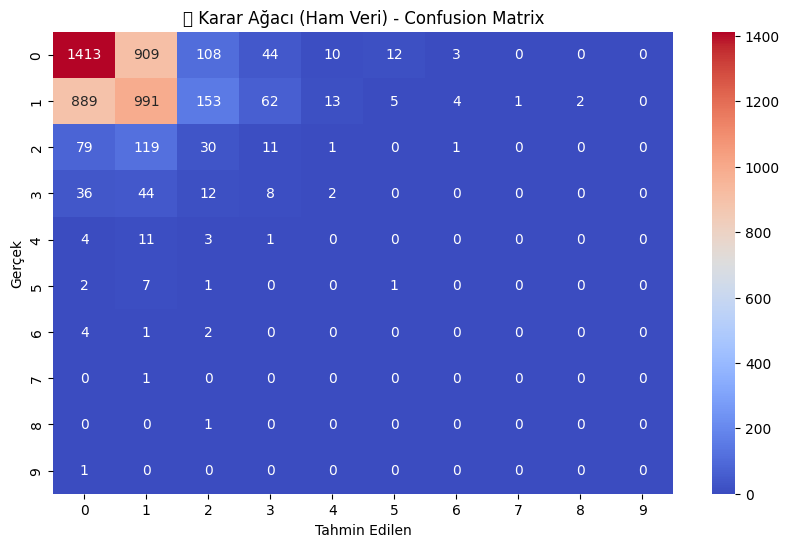

<ipython-input-3-6c52e26addef>:47: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", 10)  # 10 sınıf için renkler


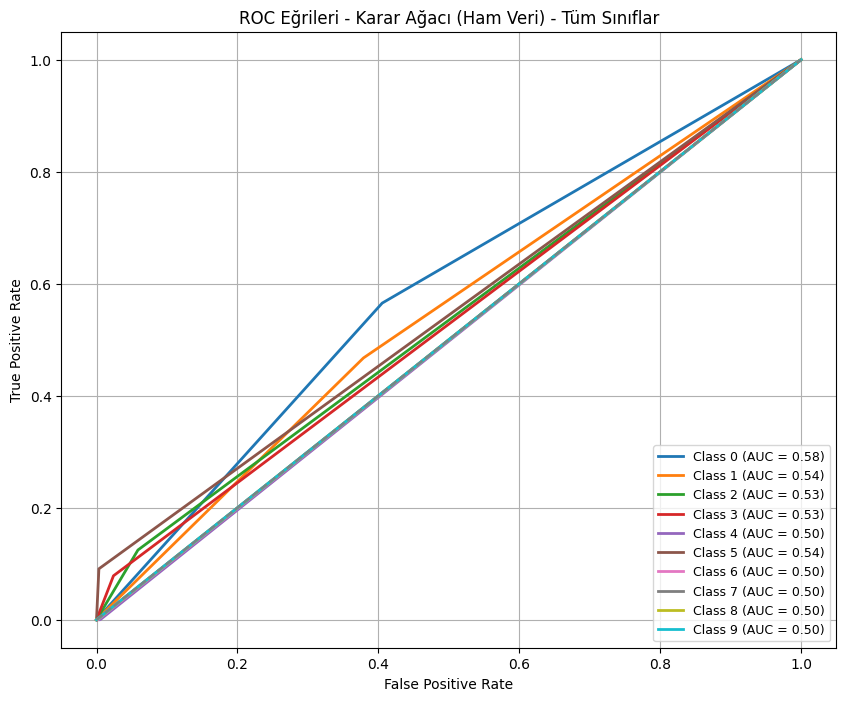

In [3]:
#  Gerekli kütüphaneler
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns

#  Veriyi yükle
columns = ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'class']
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data"
df = pd.read_csv(url, header=None, names=columns)

#  Özellik ve hedef ayrımı
X = df.drop("class", axis=1)
y = df["class"]

#  Eğitim/test ayır
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#  Karar ağacı modeli
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

#  Tahminler ve değerlendirme
y_pred = model.predict(X_test)
print("✅ Doğruluk Oranı:", accuracy_score(y_test, y_pred))
print("\n Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))

#  Karışıklık Matrisi
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="coolwarm")
plt.title(" Karar Ağacı (Ham Veri) - Confusion Matrix")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.show()

#  ROC Eğrileri (Tüm sınıflar için One-vs-Rest)
y_test_bin = label_binarize(y_test, classes=np.unique(y))
y_score = model.predict_proba(X_test)

plt.figure(figsize=(10, 8))
colors = plt.cm.get_cmap("tab10", 10)  # 10 sınıf için renkler

for i in range(10):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, color=colors(i), label=f"Class {i} (AUC = {roc_auc:.2f})")

# Referans rastgele çizgisi
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Grafik ayarları
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Eğrileri - Karar Ağacı (Ham Veri) - Tüm Sınıflar")
plt.legend(loc="lower right", fontsize=9)
plt.grid(True)
plt.show()


✅ Doğruluk Oranı: 0.6706682673069227

 Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.75      0.64      0.69      2565
           1       0.63      0.72      0.67      2068
           2       0.53      0.63      0.58       225
           3       0.46      0.57      0.51        93
           4       0.48      0.48      0.48        21
           5       0.61      0.92      0.73        12
           6       0.38      0.50      0.43        10
           7       1.00      0.50      0.67         2
           8       0.50      1.00      0.67         1
           9       1.00      1.00      1.00         1

    accuracy                           0.67      4998
   macro avg       0.63      0.70      0.64      4998
weighted avg       0.68      0.67      0.67      4998



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


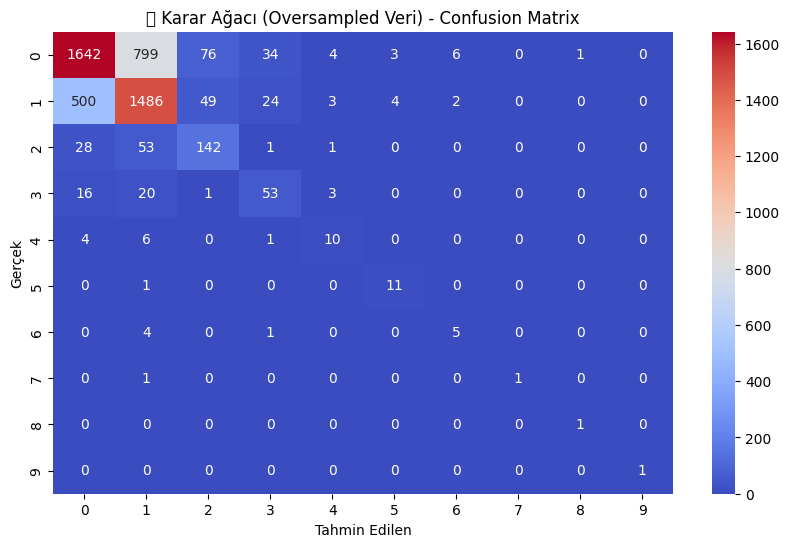

<ipython-input-4-481bfda75ecd>:65: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", 10)  # 10 sınıf için renk


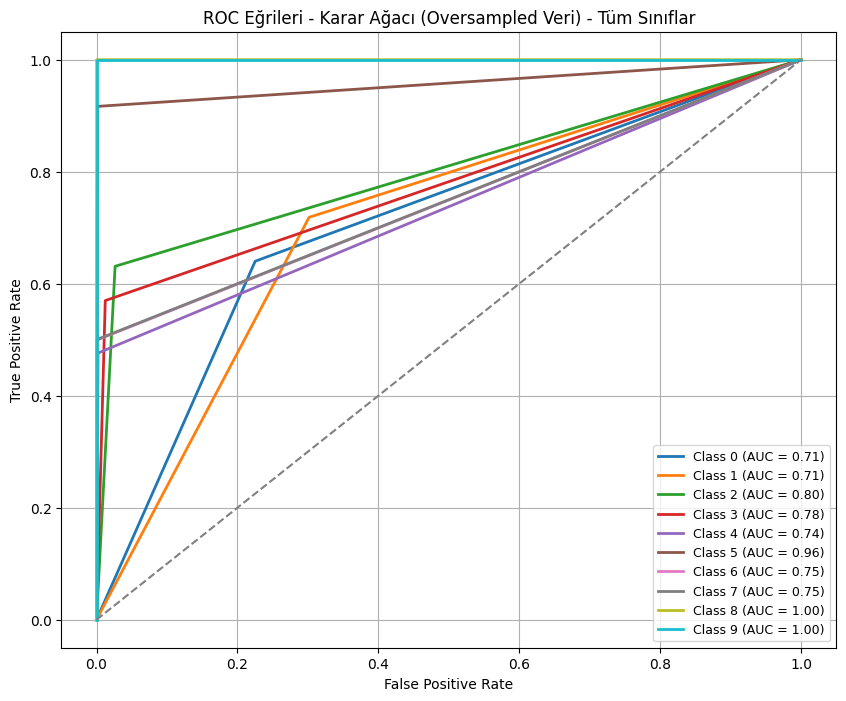

In [4]:
#  Gerekli kütüphaneler
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns

#  Sütun adları ve veri yükleme
columns = ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'class']
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data"
df = pd.read_csv(url, header=None, names=columns)

#  Oversampling ile sınıf dengesizliği çözülüyor
df_majority = df[df['class'] == 0]
df_minority = df[df['class'] != 0]
df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=42)
df_balanced = pd.concat([df_majority, df_minority_upsampled])

#  Özellik ve hedef değişkeni ayır
X = df_balanced.drop("class", axis=1)
y = df_balanced["class"]

#  Eğitim/test ayır
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#  Karar ağacı modeli
model = DecisionTreeClassifier(
    criterion='gini',
    class_weight='balanced',
    random_state=42
)

# Eğit
model.fit(X_train, y_train)

#  Tahmin
y_pred = model.predict(X_test)

#  Değerlendirme
print("✅ Doğruluk Oranı:", accuracy_score(y_test, y_pred))
print("\n Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))

#  Confusion Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="coolwarm")
plt.title(" Karar Ağacı (Oversampled Veri) - Confusion Matrix")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.show()

#  ROC Eğrileri (tüm sınıflar için)
y_test_bin = label_binarize(y_test, classes=np.unique(y))
y_score = model.predict_proba(X_test)

plt.figure(figsize=(10, 8))
colors = plt.cm.get_cmap("tab10", 10)  # 10 sınıf için renk

for i in range(10):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, color=colors(i), label=f"Class {i} (AUC = {roc_auc:.2f})")

#  Referans çizgisi
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

#  ROC Grafiği ayarları
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Eğrileri - Karar Ağacı (Oversampled Veri) - Tüm Sınıflar")
plt.legend(loc="lower right", fontsize=9)
plt.grid(True)
plt.show()
